# **Heart Risk Analysis using Big Data and Machine Learning Techniques**


## I - Installation and Setup of the Java, Hadoop, and PySaprk environments and Creation and Initialization of PySpark session.




### **1. Installation and Setup of the Java, Hadoop, and PySaprk environments.**

In [ ]:
!ls /usr/lib/jvm
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!ls /usr/lib/jvm/

# downloading and unzipping Apache Spark
!wget -q https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xvzf spark-3.3.2-bin-hadoop3.tgz

# installing findspark and pyspark
!pip install -q findspark
!pip install pyspark

# initializing environmental variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

# verify and locate spark in the colab
import findspark
findspark.init()

java-1.11.0-openjdk-amd64  java-11-openjdk-amd64
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,045 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,674 kB]
Hit:13 http://ppa.launchpad.net/ub

### **2. Creation and Initialization of PySpark session.**

In [ ]:
# creating and initializing spark session
from pyspark.sql import SparkSession
spark=SparkSession.builder\
.master("local")\
.appName("spark assignment")\
.getOrCreate()

## II - ETL Process of the heart disease dataset in xlsx format.

### **1. Importing "pandas" library in python to read and convert xlsx format file to csv format file, so that it can be read by PySpark.**

In [ ]:
# importing pandas library
import pandas as pd_pro
  
# Reading the .xlsx file and storing it
xlsx_excel_data = pd_pro.read_excel ("/content/heart_disease.xlsx")

#convert the read .xlsx file into csv file, to be accessed by PySpark  
xlsx_excel_data.to_csv ("heart_disease.csv", index = None, header=True)

### **2. Reading the csv dataset as PySpark dataframes, one of them is used for pandas in future.**

In [ ]:
#reading the csv files into dataframes
heartrisk_df = spark.read.csv('/content/heart_disease.csv', header = True, inferSchema = True)
heartrisk_df_unprocessed = spark.read.csv('/content/heart_disease.csv', header = True, inferSchema = True)
number_of_columns = heartrisk_df.count()
print('Number of rows in the dataframe :',number_of_columns)

Number of rows in the dataframe : 319795


### **3. Dataframe pre-processing to find any missing fields or abnormal data.**

In [ ]:
# checking all the columns with any Missing or Null values/observations
heartrisk_df_check = {col:heartrisk_df.filter(heartrisk_df[col].isNull()).count() for col in heartrisk_df.columns}
heartrisk_df_check

{'HeartDisease': 0,
 'BMI': 0,
 'Smoking': 0,
 'AlcoholDrinking': 0,
 'Stroke': 0,
 'PhysicalHealth': 0,
 'MentalHealth': 0,
 'DiffWalking': 0,
 'Sex': 0,
 'AgeCategory': 0,
 'Race': 0,
 'Diabetic': 0,
 'PhysicalActivity': 0,
 'GenHealth': 0,
 'SleepTime': 0,
 'Asthma': 0,
 'KidneyDisease': 0,
 'SkinCancer': 0}

In [ ]:
print("There are no Null values in any column of the dataframe. So, the data we extracted is clean.")

There are no Null values in any column of the dataframe. So, the data we extracted is clean.


### **4. Dataframe schema before any preprocessing of the dataframe.**

In [ ]:
# displaying the dataframe schema
heartrisk_df.printSchema()

root
 |-- HeartDisease: string (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoking: string (nullable = true)
 |-- AlcoholDrinking: string (nullable = true)
 |-- Stroke: string (nullable = true)
 |-- PhysicalHealth: integer (nullable = true)
 |-- MentalHealth: integer (nullable = true)
 |-- DiffWalking: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- AgeCategory: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Diabetic: string (nullable = true)
 |-- PhysicalActivity: string (nullable = true)
 |-- GenHealth: string (nullable = true)
 |-- SleepTime: integer (nullable = true)
 |-- Asthma: string (nullable = true)
 |-- KidneyDisease: string (nullable = true)
 |-- SkinCancer: string (nullable = true)



### **5. Processing the dataframe columns from string to quantitative values, which helps in finding correlation and also while selecting the features as inputs for the machine learning algorithms.**

In [ ]:
# importing col and when functions for pre-processing the dataframe 
from pyspark.sql.functions import when,col

# converting all the qualitative columns into quantitaive columns  
heartrisk_df = heartrisk_df.withColumn("HeartDisease", when(heartrisk_df.HeartDisease == "No",0) \
      .otherwise(1))
heartrisk_df = heartrisk_df.withColumn("HeartDisease", heartrisk_df.HeartDisease.cast('int'))

heartrisk_df = heartrisk_df.withColumn("Smoking", when(heartrisk_df.Smoking == "No",0) \
      .otherwise(1))
heartrisk_df = heartrisk_df.withColumn("Smoking", heartrisk_df.Smoking.cast('int'))

heartrisk_df = heartrisk_df.withColumn("AlcoholDrinking", when(heartrisk_df.AlcoholDrinking == "No",0) \
      .otherwise(1))
heartrisk_df = heartrisk_df.withColumn("AlcoholDrinking", heartrisk_df.AlcoholDrinking.cast('int'))

heartrisk_df = heartrisk_df.withColumn("Stroke", when(heartrisk_df.Stroke == "No",0) \
      .otherwise(1))
heartrisk_df = heartrisk_df.withColumn("Stroke", heartrisk_df.Stroke.cast('int'))

heartrisk_df = heartrisk_df.withColumn("DiffWalking", when(heartrisk_df.DiffWalking == "No",0) \
      .otherwise(1))
heartrisk_df = heartrisk_df.withColumn("DiffWalking", heartrisk_df.DiffWalking.cast('int'))

heartrisk_df = heartrisk_df.withColumn("Sex", when(heartrisk_df.Sex == "Male",0) \
      .otherwise(1))
heartrisk_df = heartrisk_df.withColumn("Sex", heartrisk_df.Sex.cast('int'))

heartrisk_df = heartrisk_df.withColumn("PhysicalActivity", when(heartrisk_df.PhysicalActivity == "No",0) \
      .otherwise(1))
heartrisk_df = heartrisk_df.withColumn("PhysicalActivity", heartrisk_df.PhysicalActivity.cast('int'))

heartrisk_df = heartrisk_df.withColumn("Asthma", when(heartrisk_df.Asthma == "No",0) \
      .otherwise(1))
heartrisk_df = heartrisk_df.withColumn("Asthma", heartrisk_df.Asthma.cast('int'))

heartrisk_df = heartrisk_df.withColumn("KidneyDisease", when(heartrisk_df.KidneyDisease == "No",0) \
      .otherwise(1))
heartrisk_df = heartrisk_df.withColumn("KidneyDisease", heartrisk_df.KidneyDisease.cast('int'))

heartrisk_df = heartrisk_df.withColumn("SkinCancer", when(heartrisk_df.SkinCancer == "No",0) \
      .otherwise(1))
heartrisk_df = heartrisk_df.withColumn("SkinCancer", heartrisk_df.SkinCancer.cast('int'))

heartrisk_df = heartrisk_df.withColumn("AgeCategory", when(heartrisk_df.AgeCategory == "18-24",0) \
      .when(heartrisk_df.AgeCategory == "25-29",1) \
      .when(heartrisk_df.AgeCategory == "30-34",2) \
      .when(heartrisk_df.AgeCategory == "35-39",3) \
      .when(heartrisk_df.AgeCategory == "40-44",4) \
      .when(heartrisk_df.AgeCategory == "45-49",5) \
      .when(heartrisk_df.AgeCategory == "50-54",6) \
      .when(heartrisk_df.AgeCategory == "55-59",7) \
      .when(heartrisk_df.AgeCategory == "60-64",8) \
      .when(heartrisk_df.AgeCategory == "65-69",9) \
      .when(heartrisk_df.AgeCategory == "70-74",10) \
      .when(heartrisk_df.AgeCategory == "75-79",11) \
      .otherwise(12))
heartrisk_df = heartrisk_df.withColumn("AgeCategory", heartrisk_df.AgeCategory.cast('int'))

heartrisk_df = heartrisk_df.withColumn("Diabetic", when(heartrisk_df.Diabetic == "No",0) \
      .when(heartrisk_df.Diabetic == "No, borderline diabetes",1) \
      .when(heartrisk_df.Diabetic == "Yes",2) \
      .otherwise(3))
heartrisk_df = heartrisk_df.withColumn("Diabetic", heartrisk_df.Diabetic.cast('int'))

heartrisk_df = heartrisk_df.withColumn("Race", when(heartrisk_df.Race == "American Indian/Alaskan Native",0) \
      .when(heartrisk_df.Race == "Asian",1) \
      .when(heartrisk_df.Race == "Black",2) \
      .when(heartrisk_df.Race == "Hispanic",3) \
      .when(heartrisk_df.Race == "Other",4) \
      .otherwise(5))
heartrisk_df = heartrisk_df.withColumn("Race", heartrisk_df.Race.cast('int'))

heartrisk_df = heartrisk_df.withColumn("GenHealth", when(heartrisk_df.GenHealth == "Excellent",0) \
      .when(heartrisk_df.GenHealth == "Fair",1) \
      .when(heartrisk_df.GenHealth == "Good",2) \
      .when(heartrisk_df.GenHealth == "Poor",3) \
      .otherwise(4))
heartrisk_df = heartrisk_df.withColumn("GenHealth", heartrisk_df.GenHealth.cast('int'))

heartrisk_df.show(15)

+------------+-----+-------+---------------+------+--------------+------------+-----------+---+-----------+----+--------+----------------+---------+---------+------+-------------+----------+
|HeartDisease|  BMI|Smoking|AlcoholDrinking|Stroke|PhysicalHealth|MentalHealth|DiffWalking|Sex|AgeCategory|Race|Diabetic|PhysicalActivity|GenHealth|SleepTime|Asthma|KidneyDisease|SkinCancer|
+------------+-----+-------+---------------+------+--------------+------------+-----------+---+-----------+----+--------+----------------+---------+---------+------+-------------+----------+
|           0| 16.6|      1|              0|     0|             3|          30|          0|  1|          7|   5|       2|               1|        4|        5|     1|            0|         1|
|           0|20.34|      0|              0|     1|             0|           0|          0|  1|         12|   5|       0|               1|        4|        7|     0|            0|         0|
|           0|26.58|      1|              0| 

### **6. Schema of the processed dataframe after tranformations being performed.**

In [ ]:
# displaying the schema of the dataframe
heartrisk_df.printSchema()

root
 |-- HeartDisease: integer (nullable = false)
 |-- BMI: double (nullable = true)
 |-- Smoking: integer (nullable = false)
 |-- AlcoholDrinking: integer (nullable = false)
 |-- Stroke: integer (nullable = false)
 |-- PhysicalHealth: integer (nullable = true)
 |-- MentalHealth: integer (nullable = true)
 |-- DiffWalking: integer (nullable = false)
 |-- Sex: integer (nullable = false)
 |-- AgeCategory: integer (nullable = false)
 |-- Race: integer (nullable = false)
 |-- Diabetic: integer (nullable = false)
 |-- PhysicalActivity: integer (nullable = false)
 |-- GenHealth: integer (nullable = false)
 |-- SleepTime: integer (nullable = true)
 |-- Asthma: integer (nullable = false)
 |-- KidneyDisease: integer (nullable = false)
 |-- SkinCancer: integer (nullable = false)



## III - Visualization of different features and their relationship, along with the pair-wise correlation of all the features and of the Stroke field of the dataframe.

### **1.  Visualization of various fields in the dataframe using different plots.**

### **Plot 1** - Bar plot/chart of number of persons having never diagnoised with major diseases like Asthma, Heart Disease, Skin Cancer, and Kidney Disease and got a Heart Stroke and it`s count is being visualized by grouping according to the General Health field.

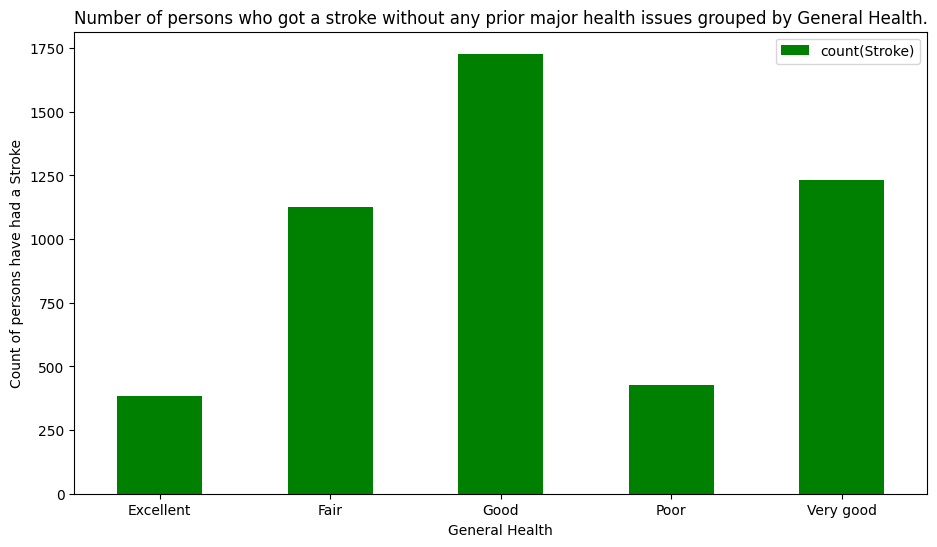

In [ ]:
# importing seaborn and plt libraries 
import seaborn as sns_pro
import matplotlib.pyplot as plt_pro

# filter the DataFrame based on the condition mentioned
heartrisk_df_unprocessed_filtered = heartrisk_df_unprocessed.filter((col('Asthma') == "No") & (col('HeartDisease') == "No")
              & (col('SkinCancer') == "No") & (col('KidneyDisease') == "No")
              & (col('Stroke') == "Yes"))

# group the filtered DataFrame by GenHealth and count the total Strokes by each group
heartrisk_df_unprocessed_grouped = heartrisk_df_unprocessed_filtered.groupBy("GenHealth").agg({"Stroke": "count"}).orderBy("GenHealth")

# convert the grouped DataFrame to a pandas DataFrame
grouped_pandas = heartrisk_df_unprocessed_grouped.toPandas()

# creating a bar plot
ax_pro = grouped_pandas.plot(x="GenHealth", kind="bar", color=[ "green"], figsize=(11,6), rot=0)

# adding axis labels and title to the plot
ax_pro.set_xlabel("General Health")
ax_pro.set_ylabel("Count of persons have had a Stroke")
ax_pro.set_title("Number of persons who got a stroke without any prior major health issues grouped by General Health.")

# display the plot
plt_pro.show()

### **Plot 2** - Stacked Bar Plot/Chart of the count of the persons having Asthma and habits like Smoking, and got a Heart Stroke visualized by grouping according to the Age Category and the percentage of the Race for each "AgeCategory" Category.

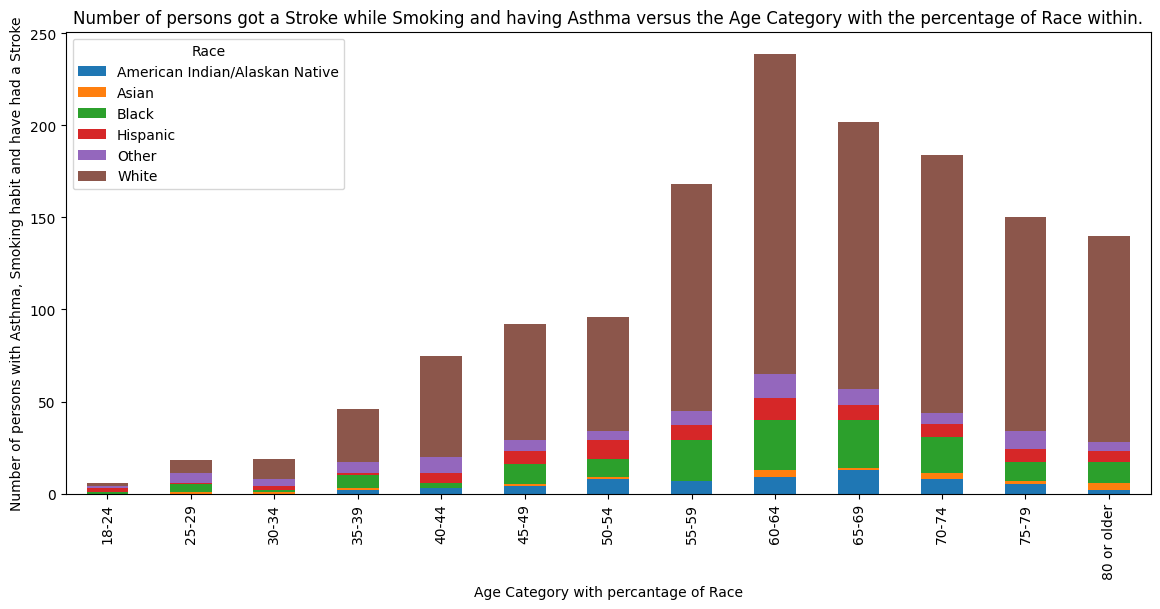

In [ ]:
# filter the DataFrame based on the condition mentioned
heartrisk_df_unprocessed_filtered = heartrisk_df_unprocessed.filter(
                                      (col("Smoking") == "Yes") &
                                      (col("Stroke") == "Yes") &
                                      (col("Asthma") == "Yes")
                                    )                 

# convert the grouped DataFrame to a pandas DataFrame
heartrisk_df_unprocessed_pandas = heartrisk_df_unprocessed_filtered.toPandas()

# group the converted pandas dataFrame by Age Category and Race and count the persons with Asthma, Smoking and have had a Stroke 
grouped = heartrisk_df_unprocessed_pandas.groupby(['AgeCategory', 'Race']).size().unstack()

# create a stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(14,6))

# set the title and axis labels
plt_pro.title('Number of persons got a Stroke while Smoking and having Asthma versus the Age Category with the percentage of Race within.')
plt_pro.xlabel('Age Category with percantage of Race')
plt_pro.ylabel('Number of persons with Asthma, Smoking habit and have had a Stroke')

# show the plot
plt_pro.show()

### **Plot 3** - Histograms of the persons who got a Heart Stroke visualized against the BMI index and splitting the data according to Sex field (Male and Female) into two groups which produces two histograms.



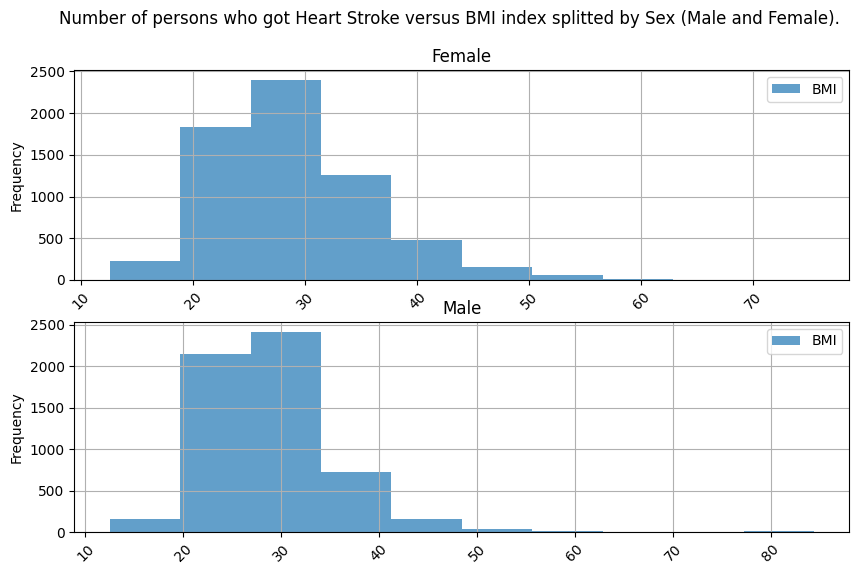

In [ ]:
# filter the DataFrame based on the condition mentioned
heartrisk_df_unprocessed_filtered = heartrisk_df_unprocessed.filter(  
                                                               (col("Stroke") == "Yes") 
                                                              )

# convert the grouped DataFrame to a pandas DataFrame
heartrisk_df_unprocessed_pandas = heartrisk_df_unprocessed_filtered.toPandas()

# create a histogram charts
heartrisk_df_unprocessed_pandas.plot(kind="hist",
               alpha = 0.7,
               title = "Number of persons who got Heart Stroke versus BMI index splitted by Sex (Male and Female).",
               rot=45,
               grid=True,
               figsize=(10,6),
               column='BMI', 
               by='Sex'
               )

# show the plot
plt_pro.show()

### **Plot 4** - Grouped Bar Plot/Chart of the count of the persons having previous Heart Stroke or a Heart Disease with Drinking or Smoking habit, and no major diseases visualized by grouping according to the Sex (Male and Female) and the percentage of the Stroke and Heart Disease within.

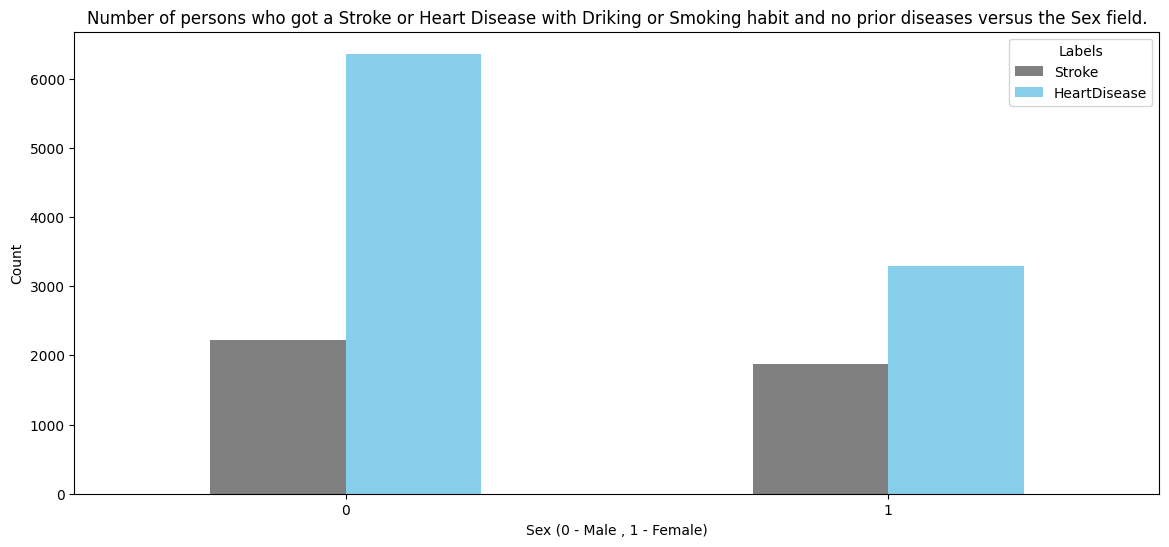

In [ ]:
# filter the DataFrame based on the given conditions
heartrisk_df_filtered = heartrisk_df.filter(
    ((col("HeartDisease") == 1) | (col("Stroke") == 1)) &
    ((col("AlcoholDrinking") == 1) | (col("Smoking") == 1)) &
    (col("SkinCancer") == 0) &
    (col("Asthma") == 0) &
    (col("KidneyDisease") == 0)
)

# group the filtered DataFrame by sleep time and count the heart diseases and strokes
heartrisk_df_grouped = heartrisk_df_filtered.groupBy("Sex").agg({"HeartDisease": "sum", "Stroke": "sum"}).orderBy("Sex")

# convert the grouped DataFrame to a pandas DataFrame
heartrisk_df_pandas = heartrisk_df_grouped.toPandas()

# create a group bar plot
ax_pro = heartrisk_df_pandas.plot(x="Sex", kind="bar", color=["grey", "skyblue"], figsize=(14,6), rot=0)

# add labels, legends, and title to the plot
ax_pro.set_xlabel("Sex (0 - Male , 1 - Female)")
ax_pro.set_ylabel("Count")
ax_pro.set_title("Number of persons who got a Stroke or Heart Disease with Driking or Smoking habit and no prior diseases versus the Sex field.")
ax_pro.legend(["Stroke","HeartDisease"],title="Labels")

# show the plot
plt_pro.show()


### **Plot 5** - Pie Charts/Plots of the persons have had a Heart Stroke visualized by grouping according to the Diabetic and General Health fields.

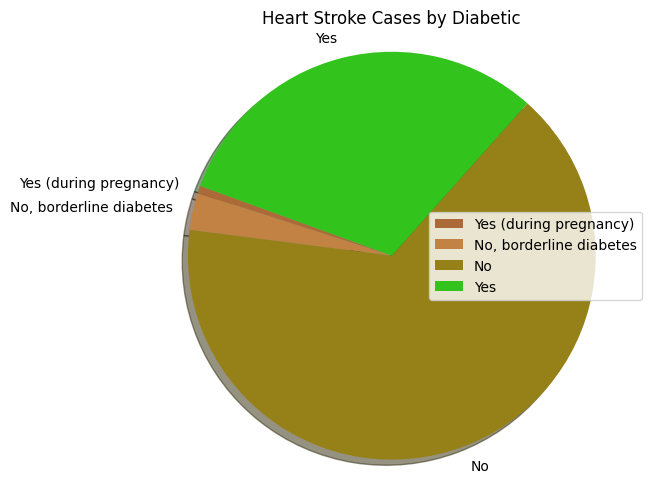

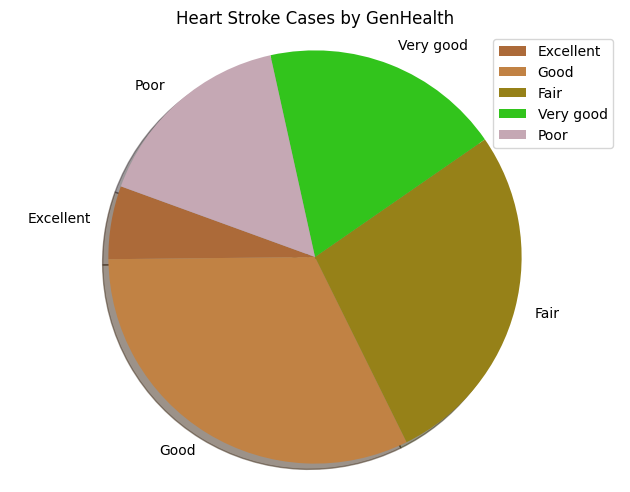

In [ ]:
# importing count function
from pyspark.sql.functions import count
import random

# creating a list for types of pie chart 
pieChart_group = ['Diabetic', 'GenHealth']

# selecting random colors each time we run the code
sixDigitHexCode=6
colorRandom = ["#" + ''.join([random.choice('0123456789ABCD')
                        for j in range(6)]) for i in range(sixDigitHexCode)]

# loop through each criteria and create a pie chart
for col_name in pieChart_group:
    # Group by criteria and count heart stroke cases
    heartrisk_df_unprocessed_grouped = heartrisk_df_unprocessed.groupBy(col_name).agg(
        count(when(col('Stroke') == "Yes", True)).alias('HeartStrokeCount')
    )

    # convert the grouped DataFrame to a pandas DataFrame
    criteria_counts_df = heartrisk_df_unprocessed_grouped.toPandas()
   
    # Create the pie chart
    plt_pro.pie(criteria_counts_df['HeartStrokeCount'].sort_index(), 
            labels=criteria_counts_df[col_name], shadow=True, startangle=160,colors=colorRandom )
    
    # add labels, legends, and title to the plot
    plt_pro.axis('equal')
    plt_pro.legend(criteria_counts_df[col_name])
    plt_pro.tight_layout()
    plt_pro.title(f'Heart Stroke Cases by {col_name}')

    # display the plot
    plt_pro.show()

### **2. Gaining insights from the correlation function and other plots.**

### 2.a Conversion of PySpark dataframe into pandas dataframe for correlation.

In [ ]:
# converting PySpark dataframe into pandas dataframe
correlation_stroke = heartrisk_df.toPandas()

# display the converted pandas dataframe
correlation_stroke.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,1,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,1,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,0,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,1,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,1,4,5,0,1,4,8,0,0,0


### 2.b Finding Pair-wise correlation of every columns of the pandas dataframe.

In [ ]:
# corr() used to find correlations for dataframe 
correlation_stroke.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,-0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,-0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,-0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,-0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,-0.070040,-0.026940,-0.085052,-0.004200,0.003091,0.040904,0.100058,0.068860,1.000000,0.067478,-0.018855,0.013456,-0.048247,0.010283,0.015704,0.069191,0.009084,-0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


### 2.c Import seaborn and plt libraries to visualize the correlations and further visualizations.

<Axes: >

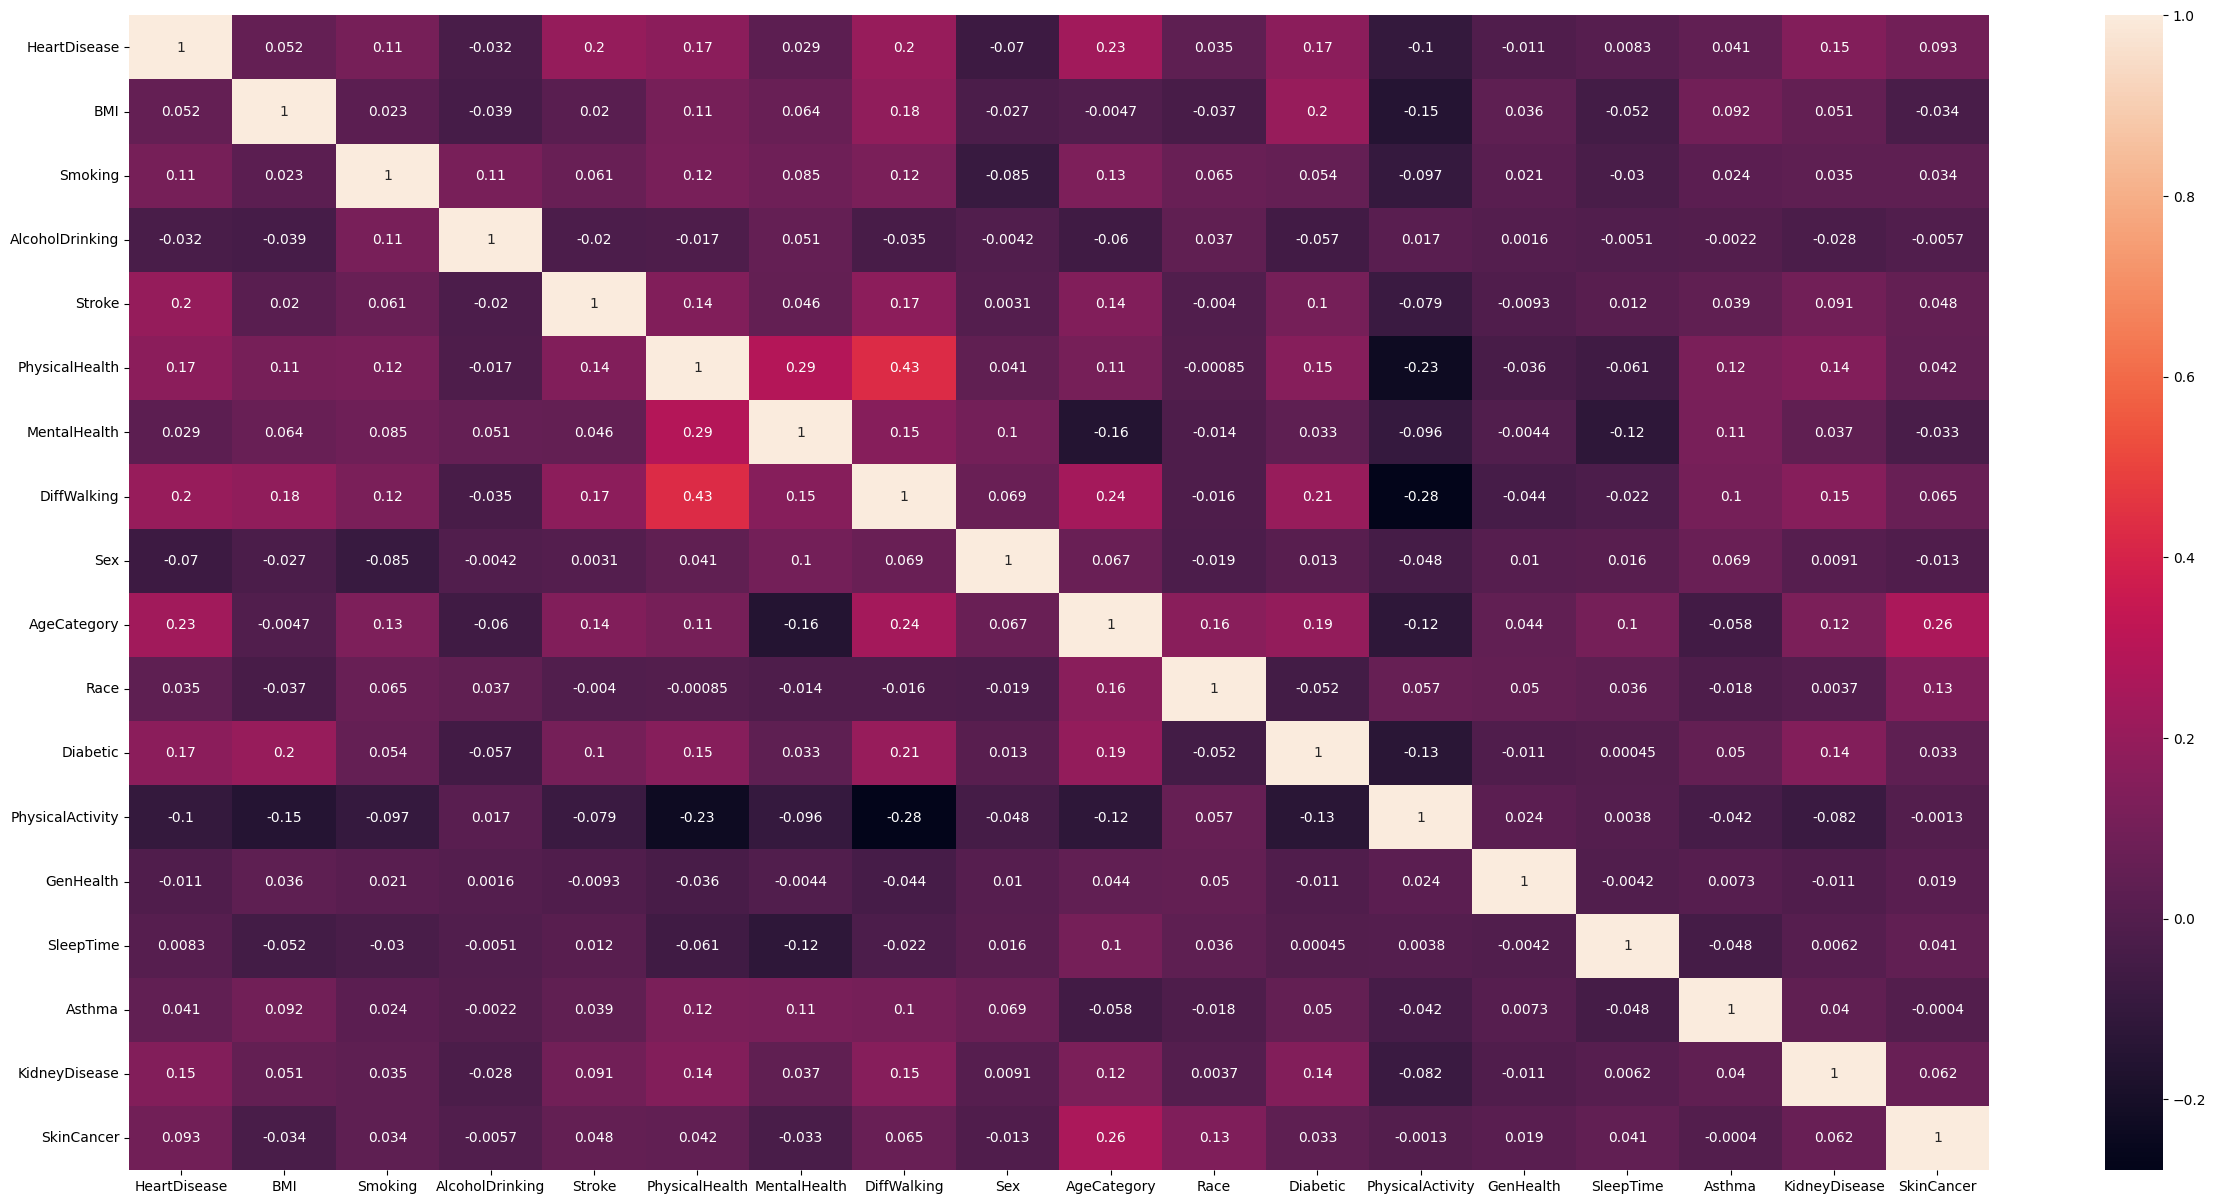

In [ ]:
# importing seaborn and plt libraries 
import seaborn as sns_pro
import matplotlib.pyplot as plt_pro

#creating figures and further subplots
fig, ax = plt_pro.subplots(figsize=(30, 15))

# plotting the heatmap for pair-wise correlations of the dataframe
sns_pro.heatmap(correlation_stroke.corr(), ax=ax, annot=True)

### 2.d Extracting the correlations against Stroke field and visualizing by sorting the correlation values.

<Axes: >

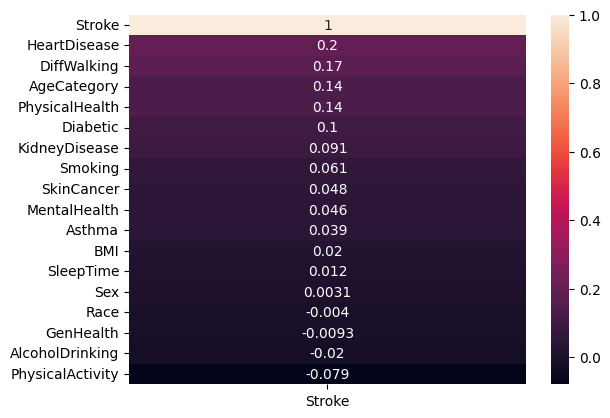

In [ ]:
# extracting the correaltion of Stroke and sorting
correlation_stroke_order = correlation_stroke.corr()[['Stroke']].sort_values(by='Stroke',ascending=False)

# display the plot for sorted correlation of Stroke with all the fields
sns_pro.heatmap(correlation_stroke_order, annot=True)

### **3. Insights from the above visualizations of correlation and other variables with respect to the Stroke feature.**

1.   As it can be observed from the plots that HeartDisease and AgeCategory fields can be served as crucial features in determining the relation with the Stroke (Heart Stroke) field.

2.   However, in the findings using pair-wise correlation of the Stroke feature, surprisingly DiffWalking (Difficulty in walking) has higger correlation with the Stroke field compared to AgeCategory.

3. In a nutshell, the features HeartDisease, DiffWalking, and AgeCategory can be considered as the best selectable features which can serve to predict the Stroke field (Heart Stroke) precisely when given as a feature vector to any predictive machine learning model.

 

## IV - Prediction of Heart Stroke using Machine Learning Models.

### **1. Balancing the imbalanced dataset using resampling technique.**

In [ ]:
# importing resample function to resample the dataframe
from sklearn.utils import resample
import pandas as pd_pro

# converting PySpark dataframe into pandas dataframe
correlation_stroke = heartrisk_df.toPandas()

# splitting data into majority and minority based on the Stroke field
heartrisk_df_majority = correlation_stroke[correlation_stroke.Stroke==0]
heartrisk_df_minority = correlation_stroke[correlation_stroke.Stroke==1]

# resampling the dataframe
heartrisk_df_minority_resample = resample(heartrisk_df_minority,
                                replace=True,
                                n_samples = 60345,
                                random_state=7191)

# concatenating the resampled and majority data
heartrisk_df_balanced_pandas = pd_pro.concat([heartrisk_df_majority,heartrisk_df_minority_resample])

# showing the difference before and after the resmapling 
print('Number of rows after resampling the minority of the dataframe where Stroke equals 0 and 1 respectively:')
heartrisk_df.groupBy('Stroke').count().show()

#converting pandas balanced dataframe to PySpark dataframe
heartrisk_df_balanced = spark.createDataFrame(heartrisk_df_balanced_pandas)
print('Number of rows after resampling the minority of the dataframe where Stroke equals 0 and 1 respectively:')
heartrisk_df_balanced.groupBy('Stroke').count().show()

Number of rows after resampling the minority of the dataframe where Stroke equals 0 and 1 respectively:
+------+------+
|Stroke| count|
+------+------+
|     1| 12069|
|     0|307726|
+------+------+



/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


Number of rows after resampling the minority of the dataframe where Stroke equals 0 and 1 respectively:
+------+------+
|Stroke| count|
+------+------+
|     0|307726|
|     1| 60345|
+------+------+



### **2. Random Forest Classifier on Stroke feature for prediction.**

### 2.a. Feature Selection for Random Forest Classifier using Feature Transformation technique i.e. Vector Assembler according to the insights from above insights.

In [ ]:
# importing Vector Assembler for feature tranformation
from pyspark.ml.feature import VectorAssembler

# tranforming the features into a single vector feature
assembler_pro = VectorAssembler(inputCols=['HeartDisease','DiffWalking','AgeCategory'], 
                            outputCol="features")
feature_vec_ml=assembler_pro.transform(heartrisk_df_balanced).select('features','Stroke')

# displaying the dataframe with feature selection and label as a columns
feature_vec_ml.show(5)

+--------------+------+
|      features|Stroke|
+--------------+------+
| [0.0,0.0,7.0]|     0|
| [0.0,0.0,9.0]|     0|
|[0.0,0.0,11.0]|     0|
| [0.0,1.0,4.0]|     0|
|[1.0,1.0,11.0]|     0|
+--------------+------+
only showing top 5 rows



### 2.b. Spliting the dataframe into training and testing data.

In [ ]:
# splitting the data into traning and testing in 80:20 ratio
balanced_train_data, balanced_test_data = feature_vec_ml.randomSplit([.80,.20],seed=7191)

### 2.c. Implementation of the Random Forest Classifier, a Machine Learning model used in classification.

In [ ]:
# importing RandomForestClassfier and confusion_matrix and other required libraries
from pyspark.ml.classification import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# setting paramenters for the grid search for the model
rf_pro = RandomForestClassifier( labelCol='Stroke',seed=7191)

# hypertuning the model by setting the parameters
parameters_Grid_rfc = (ParamGridBuilder()\
             .addGrid(rf_pro.maxDepth,[8,9,10])\
             .addGrid(rf_pro.numTrees,[10,20,30])\
             .build())

# setting evaluator for the model with metrics
evaluator_rfc = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Stroke', metricName='accuracy')

# Creating Cross Validator with 3 folds and other paramters
cv_rfc = CrossValidator(estimator=rf_pro, estimatorParamMaps=parameters_Grid_rfc, evaluator=evaluator_rfc, numFolds=3)

# training the model with the training data
cvModel_rfc = cv_rfc.fit(balanced_train_data)

# testing the trained model against the unseen testing data
predictions_rfc = cvModel_rfc.transform(balanced_test_data)

# storing the predictions of the model
evaluator_rfc.evaluate(predictions_rfc) 

# reading predicted and oridinal values to create a confusion matrix
predictions_stroke_rfc=predictions_rfc.select("prediction").collect()
original_stroke_rfc=predictions_rfc.select("Stroke").collect()

# creation of confusion matrix 
cm_rfc = confusion_matrix(original_stroke_rfc, predictions_stroke_rfc)

# displaying the confusion matrix of the Random Forest Classifier
print("Confusion Matrix produced by the Random Forest Classifier:")
print(cm_rfc)

Confusion Matrix produced by the Random Forest Classifier:
[[59951  1532]
 [ 9674  2320]]


### 3.d. Performance Metrics of the RandomForestClassifier Model after testing on the unseen testing data.

In [ ]:
# getting the f1 score provided by the RandomForestClassifier on predicting the Stroke field
evaluator_rfc = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Stroke', metricName='f1')
predictions_rfc = cvModel_rfc.transform(balanced_test_data)
print("Prediction F1-score by RandomForestClassifier: ", evaluator_rfc.evaluate(predictions_rfc)) 

# getting the accuracy provided by the RandomForestClassifier on predicting the Stroke field
evaluator_rfc = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Stroke', metricName='accuracy')
predictions_rfc = cvModel_rfc.transform(balanced_test_data)
print("Prediction Accuracy by RandomForestClassifier: ", evaluator_rfc.evaluate(predictions_rfc))

# getting the recall provided by the NaiveBayesClassifier on predicting the Stroke field
recall_nbc=((cm_rfc[0][0])/(cm_rfc[0][0]+cm_rfc[0][1]))
print("Prediction Recall by RandomForestClassifier: ",recall_nbc)

# getting the precision provided by the NaiveBayesClassifier on predicting the Stroke field
precision_nbc=(cm_rfc[0][0])/(cm_rfc[0][0]+cm_rfc[1][0])
print("Prediction Precision by RandomForestClassifier: ",precision_nbc)

Prediction F1-score by RandomForestClassifier:  0.8130437847056478
Prediction Accuracy by RandomForestClassifier:  0.8474896906514964
Prediction Recall by RandomForestClassifier:  0.9750825431420067
Prediction Precision by RandomForestClassifier:  0.8610556552962298


### **3. Naive Bayes Classifier on Stroke feature for prediction.**

### 3.a. Feature Selection for Naive Bayes needs to be done separately, as the predictor column 'Stroke' must be named as 'label' for the naive bayes model to run.

In [ ]:
from pyspark.sql.functions import col

# renaming the Stroke 
naive_df = heartrisk_df_balanced.withColumnRenamed("Stroke","label")

# tranforming the features into a single vector feature
assembler_pro = VectorAssembler(inputCols=['HeartDisease','DiffWalking','AgeCategory'], 
                            outputCol="features")
naive_feature_vec=assembler_pro.transform(naive_df).select('features','label')

# displaying the dataframe with feature selection and label as a columns
naive_feature_vec.show(5)

+--------------+-----+
|      features|label|
+--------------+-----+
| [0.0,0.0,7.0]|    0|
| [0.0,0.0,9.0]|    0|
|[0.0,0.0,11.0]|    0|
| [0.0,1.0,4.0]|    0|
|[1.0,1.0,11.0]|    0|
+--------------+-----+
only showing top 5 rows



### 3.b. Spliting the dataframe into training and testing data.

In [ ]:
# splitting the data into traning and testing in 80:20 ratio
balanced_train_data, balanced_test_data = naive_feature_vec.randomSplit([.80,.20],seed=7191)

### 3.c. Implementation of the Naive Bayes Classifier, a Machine Learning model used in classification.

In [ ]:
# importing Naivebayes and confusion_matrix and other required libraries
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from sklearn.metrics import confusion_matrix

# setting paramenters for the grid search for the model
nb_pro = NaiveBayes(smoothing=1.0, modelType="multinomial")

# training the model with the training data
nb_pro = nb_pro.fit(balanced_train_data)

# testing the trained model against the unseen testing data
predictions_nbc = nb_pro.transform(balanced_test_data)

# reading predicted and oridinal values to create a confusion matrix
predictions_stroke_nbc=predictions_nbc.select("prediction").collect()
original_stroke_nbc=predictions_nbc.select("label").collect()

# creation of confusion matrix 
cm_nbc = confusion_matrix(original_stroke_nbc, predictions_stroke_nbc)

accuracy = (cm_nbc[0][0]+cm_nbc[1][1])/cm_nbc.sum()
# displaying the confusion matrix of the Naive Bayes Classifier
print("Confusion Matrix produced by the Naive Bayes Classifier:")
print(cm_nbc)

Confusion Matrix produced by the Naive Bayes Classifier:
[[61193   290]
 [11529   465]]


### 3.d. Performance Metrics of the NaiveBayesClassifier Model after testing on the unseen testing data.

In [ ]:
# getting the f1 score provided by the NaiveBayesClassifier on predicting the Stroke field
evaluator_nbc=MulticlassClassificationEvaluator(predictionCol="prediction", labelCol='label',
                                            metricName='f1')
f1_nbc = evaluator_nbc.evaluate(predictions_nbc)
print("Prediction f1-score by NaiveBayesClassifier: ", f1_nbc)

# getting the accuracy provided by the NaiveBayesClassifier on predicting the Stroke field
evaluator_nbc=MulticlassClassificationEvaluator(predictionCol="prediction", labelCol='label',
                                            metricName='accuracy')
acc_nbc = evaluator_nbc.evaluate(predictions_nbc)
print("Prediction Accuracy by NaiveBayesClassifier: ", acc_nbc)

# getting the recall provided by the NaiveBayesClassifier on predicting the Stroke field
recall_nbc=((cm_nbc[0][0])/(cm_nbc[0][0]+cm_nbc[0][1]))
print("Prediction Recall by NaiveBayesClassifier: ",recall_nbc)

# getting the precision provided by the NaiveBayesClassifier on predicting the Stroke field
precision_nbc=(cm_nbc[0][0])/(cm_nbc[0][0]+cm_nbc[1][0])
print("Prediction Precision by NaiveBayesClassifier: ",precision_nbc)

Prediction f1-score by NaiveBayesClassifier:  0.7749815080887901
Prediction Accuracy by NaiveBayesClassifier:  0.8391469439416416
Prediction Recall by NaiveBayesClassifier:  0.9952832490281867
Prediction Precision by NaiveBayesClassifier:  0.8414647561948241


## V. Testing

In [ ]:
# preapring testing dataframe
test_features = pd_pro.DataFrame({
   'HeartDisease':[1.0,0.0,1.0,0.0],
   'DiffWalking': [1.0,0.0,1.0,0.0],
   'AgeCategory': [3.0,6.0,2.0,10.0],
   'label': [1,1,0,1]
})

# Create spark dataFrame from test feature dataframe
test_df = spark.createDataFrame(test_features)

# creating vector of features and labels
assembler_test = VectorAssembler(inputCols=['HeartDisease','DiffWalking','AgeCategory'], 
                            outputCol="features")
test_feature_vec=assembler_test.transform(test_df).select('features','label')

print('testing feature vector:')
test_feature_vec.show()

# testing the trained models against the unseen testing data
predictions_test_rfc = cvModel_rfc.transform(test_feature_vec)

predictions_test_nb = nb_pro.transform(test_feature_vec)

# data of model performance after testing the model on unseen data

print('performance metrics of the random forest classifier:')
predictions_test_rfc.select("features", "prediction", "probability").show(truncate=False)

print('performance metrics of the naive bayes classifier:')
predictions_test_nb.select("features", "prediction", "probability").show(truncate=False)

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


testing feature vector:
+--------------+-----+
|      features|label|
+--------------+-----+
| [1.0,1.0,3.0]|    1|
| [0.0,0.0,6.0]|    1|
| [1.0,1.0,2.0]|    0|
|[0.0,0.0,10.0]|    1|
+--------------+-----+

performance metrics of the random forest classifier:
+--------------+----------+----------------------------------------+
|features      |prediction|probability                             |
+--------------+----------+----------------------------------------+
|[1.0,1.0,3.0] |1.0       |[0.45212256560622655,0.5478774343937735]|
|[0.0,0.0,6.0] |0.0       |[0.8831831757130395,0.11681682428696058]|
|[1.0,1.0,2.0] |1.0       |[0.42027995467961227,0.5797200453203877]|
|[0.0,0.0,10.0]|0.0       |[0.8831831757130395,0.11681682428696058]|
+--------------+----------+----------------------------------------+

performance metrics of the naive bayes classifier:
+--------------+----------+----------------------------------------+
|features      |prediction|probability                           

## VI. Conclusion 

* As per the dataset, the prediction is done on the feature Stroke (Heart Stroke), whether or with how much probability does a person can expect a heart stroke in the near future depending on various other effecting features like previous Heart Disease, Kidney Disease, Skin Cancer, Difficulty in walking, etc.

* On pre-processing the data and with the help of visualizations and pair-wise correlation between all the features and on the Stroke feature, a feature vector is created using feature transformation: ['HeartDisease','DiffWalking','AgeCategory'] as it is passed into machine learning models.

* Random Forest Classifier and Naive Bayes Classifier are the two machine learning models which have been selected to classify the Stroke feature (0 or 1), as they are the model which perform their best when comes to the classification problems.

* It can be observed that the accuracy provided by the Random Forest Classifier, i.e. around 85%, whereas the accuracy provided by the Naive Bayes Classifier i.e. around 84%. Both the models performed close to one another, but Random Forest Classifier clearly well suited for the existing problem of Stroke Classification.
